<center>
<a href="https://exed.polytechnique.edu/fr" ><img src="https://exed.polytechnique.edu/sites/all/themes/college/images/logo.png" style="float:left; max-width: 360px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Apprentissage Statistique](https://github.com/wikistat/Apprentissage)

# GRC: Score d'appétence d'un produit bancaire  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Résumé
Les données sont composées de 825 clients d'une banque décrits par 32 variables concernant leurs avoirs, et utilisations de leurs comptes. Le premier objectif est une exploration du jeu de données, une segmentation ou profilage des types de comportement des clients, le 2ème consiste à estimer puis prévoir un *score d'appétence* pour un produit bancaie, ici la carte visa premier. Comparaison des différentes méthodes et algorihtmes d'apprentissage pour atteindre cet objectif de la régression logistique au *boosting* (*extrem gradient*) en passant par les arbres, les SVM ou random forest. Une procédure de validation croisée généralisée est itérée sur une selection de ces méthodes. Celles d'agrégation de modèles conduisent aux meilleurs résultats. 

## Introduction


### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables initiales et de leur libellé* Attention, certains sont écrits en majuscules dans les programmes puis en minuscules après transfomation des données (logarithme, recodage) au cours d ela phase d'exploration. Les noms des variables logarithmes des variables quantitatives se terminent par `L`les variables qualitatives se terminent par `Q`ou `q`. 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**



## Préparation des données
### Lecture 
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps. Elles sont issues de la première phase de [prétraitement](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb) ou *data munging* pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables. 

In [ ]:
# Importation des librairies.
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn import neighbors, preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, FunctionTransformer
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC




In [ ]:
# Lecture d'un data frame
vispremv = pd.read_table('vispremv.dat', delimiter=' ')
vispremv.shape


(1063, 54)

In [ ]:
vispremv.head()

SEXEQ FAMIQ PCSPQ kvunbq  ...     ITAVCL     HAVEFL    JNBJDL CARVP
148009  Shom  Fcou  Pint     K1  ...  14.080718  13.230263  0.693147  Coui
552427  Shom  Fcou  Pint     K0  ...  11.717872   0.000000  0.000000  Coui
556005  Shom  Fseu  Psan     K0  ...  11.329303   0.000000  0.000000  Coui
556686  Shom  Fseu  Pouv     K0  ...  13.111856   9.972267  2.772589  Coui
642680  Shom  Fcou  Pint     K0  ...  11.304904   0.000000  1.386294  Coui

[5 rows x 54 columns]

In [ ]:
vispremv['PCSPQ'].unique()

array(['Pint', 'Psan', 'Pouv', 'Pemp', 'Pcad'], dtype=object)

In [ ]:
# Variables quantitatives
vispremv.describe()

RELAT         AGER  ...       HAVEFL       JNBJDL
count  1063.000000  1063.000000  ...  1063.000000  1063.000000
mean    132.574788    42.573848  ...     3.043170     1.189791
std      93.499830    11.912343  ...     4.665580     1.587594
min      -2.000000    18.000000  ...     0.000000     0.000000
25%      42.500000    33.000000  ...     0.000000     0.000000
50%     130.000000    43.000000  ...     0.000000     0.000000
75%     204.500000    52.000000  ...     6.216606     2.441401
max     393.000000    65.000000  ...    15.770893     4.905275

[8 rows x 28 columns]

Vérifier ci-dessous que la plupart des variables ont deux versions, l'une quantitative et l'autre qualitative. 

Les variables qualitatives (sexe, csp, famille) sont transformées en indicatrices à l'exception de la cible `CARVP`.

In [ ]:
vispremv.AGER.head(), vispremv.ageq.head(), 

(148009    51
 552427    58
 556005    27
 556686    49
 642680    64
 Name: AGER, dtype: int64, 148009    A2
 552427    A2
 556005    A0
 556686    A1
 642680    A2
 Name: ageq, dtype: object)

In [ ]:
vispremv.dtypes

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

In [ ]:
# Transformation en indicatrices
vispremDum = pd.get_dummies(vispremv[["SEXEQ", "FAMIQ", "PCSPQ"]])
# Une seule est conservée pour les variables binaires
vispremDum.drop(["SEXEQ_Sfem", "FAMIQ_Fseu"], axis=1, inplace=True)
# Sélection des variables numériques
vispremNum = vispremv.select_dtypes(exclude=['object'])
# Concaténation des variables retenues
vispremR = pd.concat([vispremDum, vispremNum], axis=1)
print(vispremR.columns)

Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan', 'RELAT', 'AGER', 'OPGNBL', 'MOYRVL',
       'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY',
       'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL',
       'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG',
       'ITAVCL', 'HAVEFL', 'JNBJDL'],
      dtype='object')


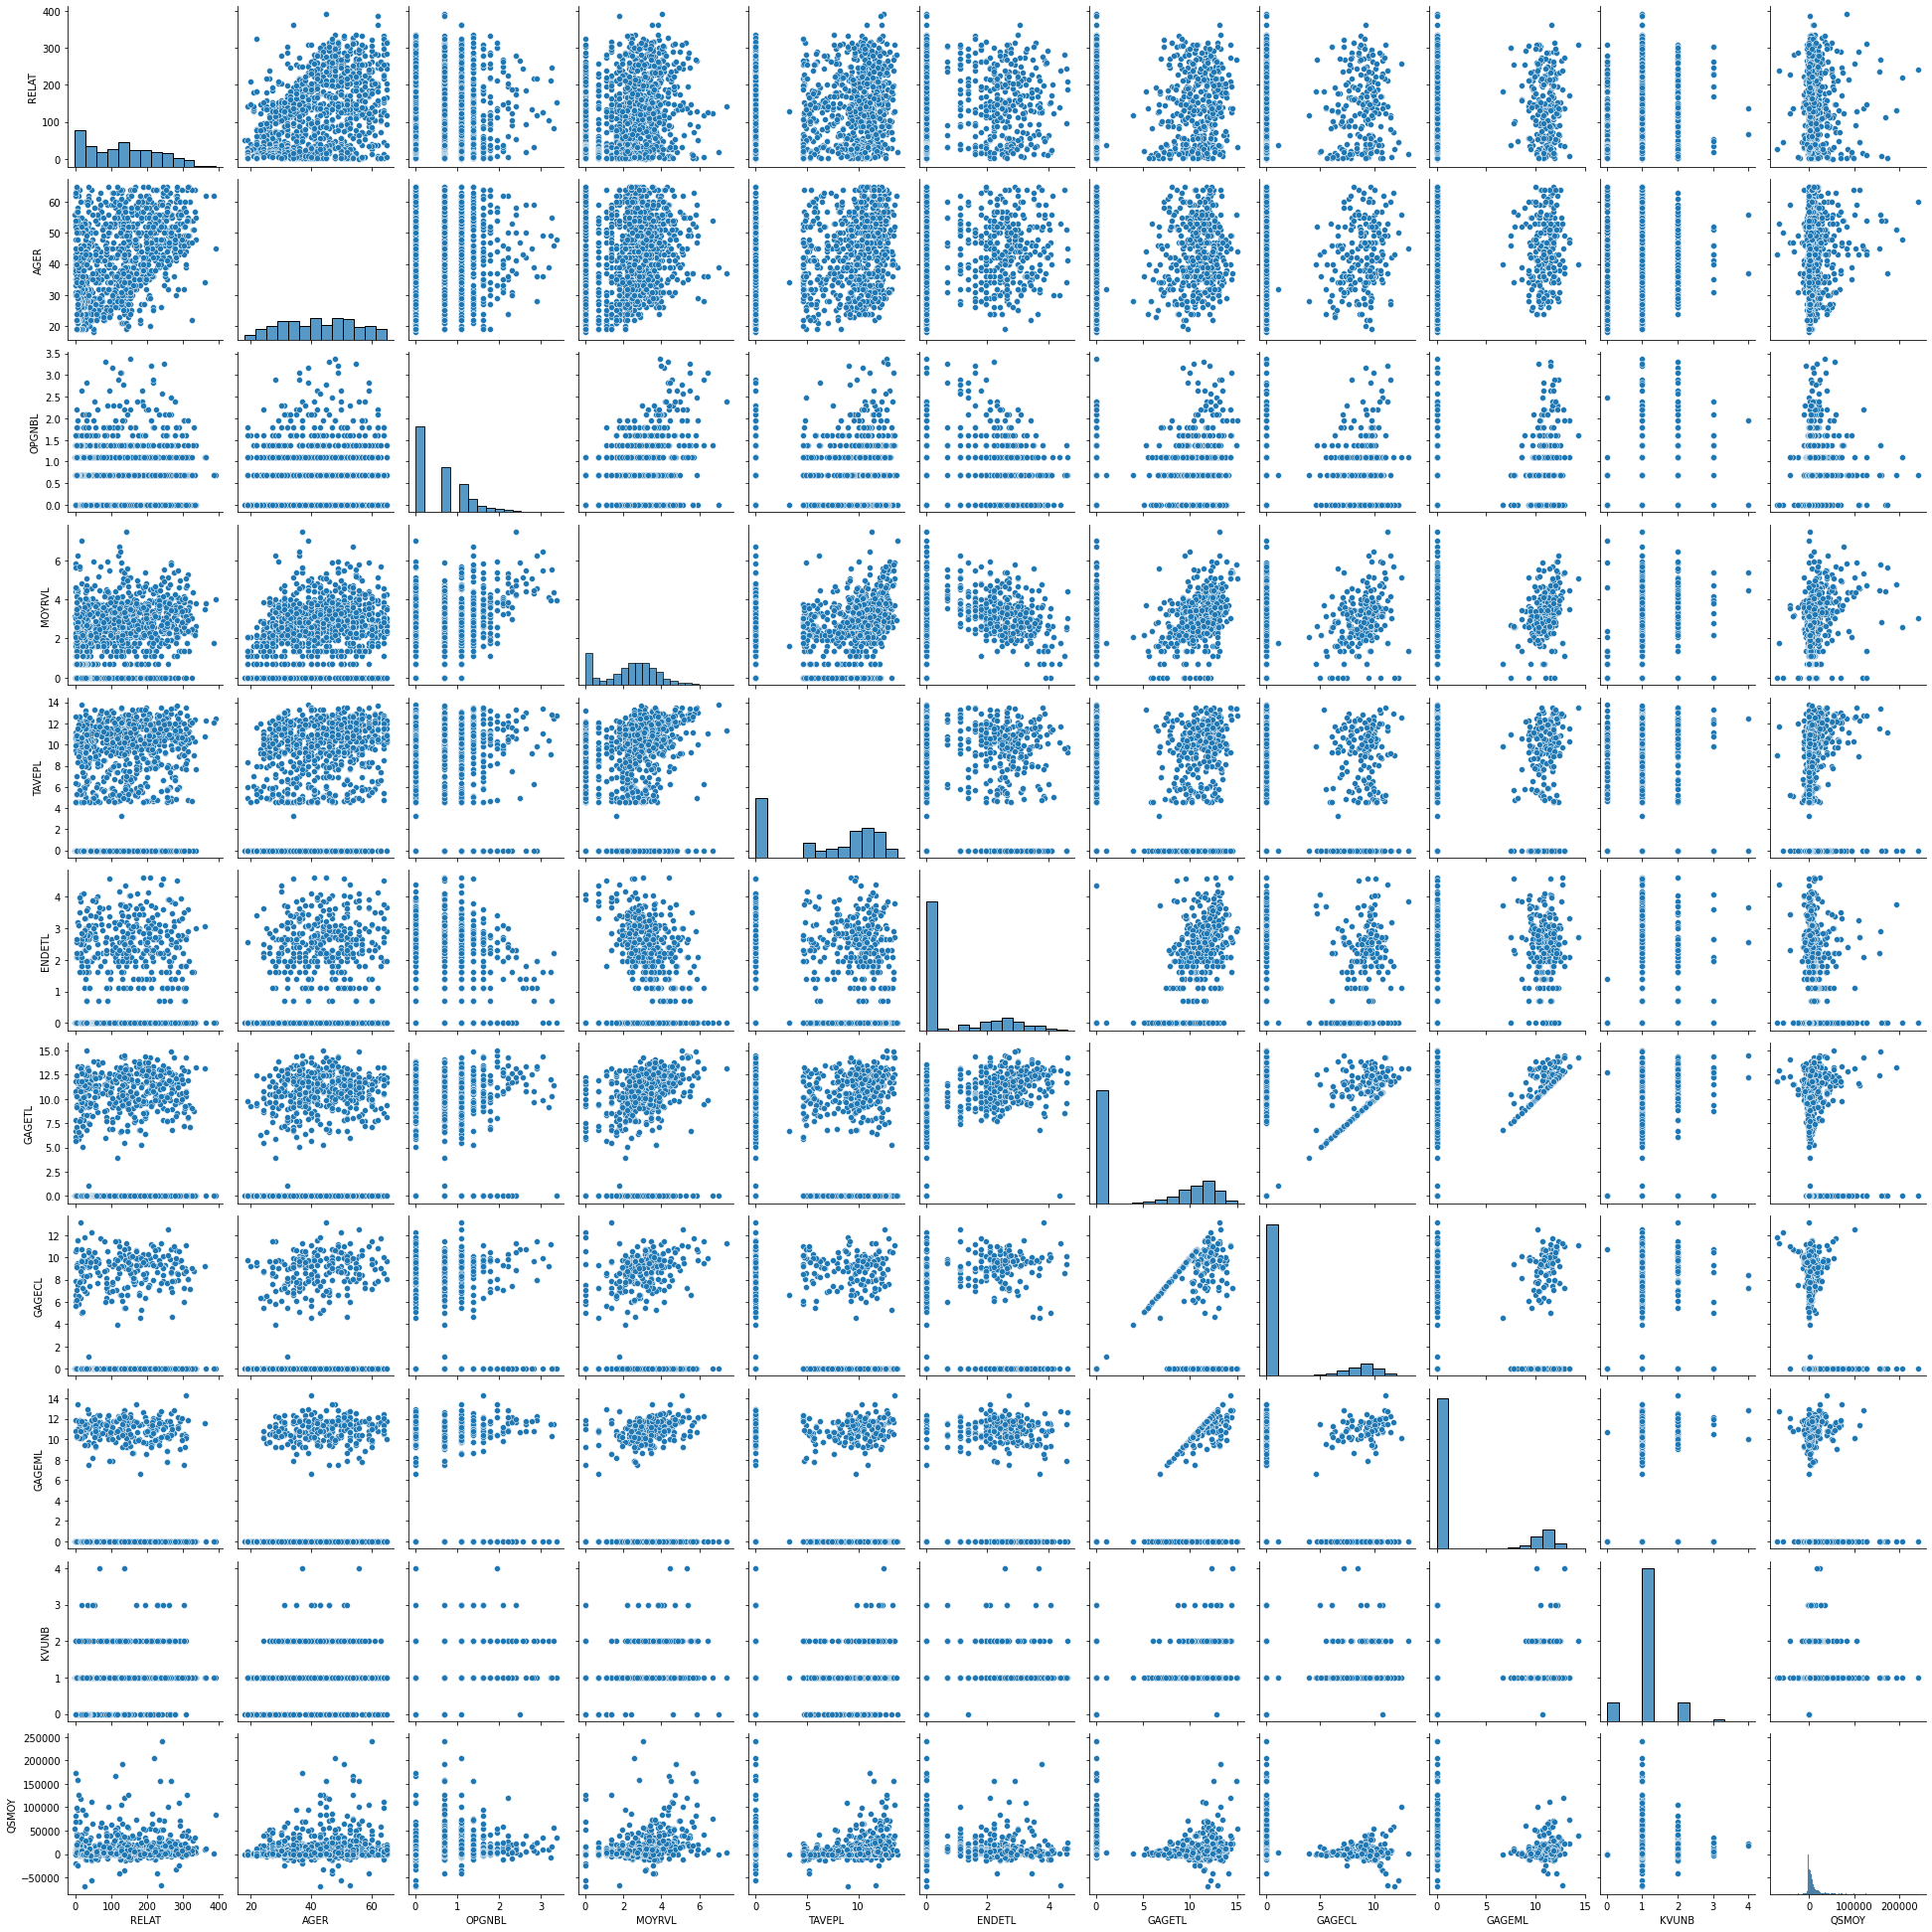

In [41]:
sns.pairplot(vispremR[['RELAT','AGER', 'OPGNBL', 'MOYRVL','TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY']])

In [ ]:
# La variable à expliquer est recodée
y=vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

**Q** Combien d'individus et combien de variables sont finalement concernés? 

In [ ]:
print(vispremR.shape)

scaler = StandardScaler()

scaler.fit(vispremR)
X_train_scaled = scaler.transform(vispremR)


(1063, 35)


In [ ]:

pca = PCA(n_components=20)
pca_obj=pca.fit_transform(X_train_scaled)
#Pourcentage de variance expliquée par les axes retenus.
sum(pca.explained_variance_ratio_)


0.9099555760040928

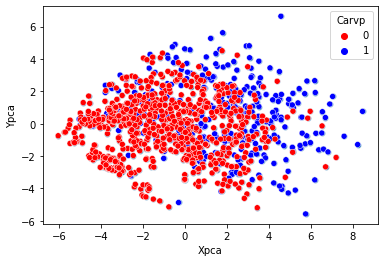

In [ ]:
pca_df = pd.DataFrame({'Xpca':pca_obj[:,0],
                        'Ypca':pca_obj[:,1],
                        'Carvp':y})
pca_df.head()
sns.scatterplot(x="Xpca", y="Ypca",
              data=pca_df);
sns.scatterplot(x="Xpca", y="Ypca",
              hue="Carvp",
              palette=['red','blue'],
              legend='full',
              data=pca_df);

In [ ]:

tsne = TSNE(n_components=3, random_state=0)
tsne_obj= tsne.fit_transform(X_train_scaled)

In [ ]:
tsne_df = pd.DataFrame({'Xtsne':tsne_obj[:,0],
                        'Ytsne':tsne_obj[:,1],
                        'Carvp':y})
tsne_df.head()

Xtsne      Ytsne  Carvp
148009  -3.550498   8.111454      1
552427  14.553095 -12.513491      1
556005  -0.809978  17.251547      1
556686  -1.497649  13.123475      1
642680   4.984999   2.959355      1

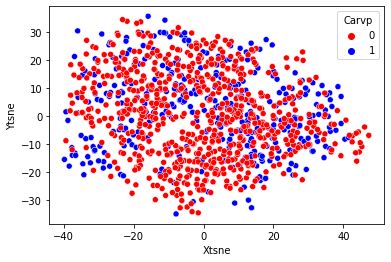

In [ ]:
sns.scatterplot(x="Xtsne", y="Ytsne",
              hue="Carvp",
              palette=['red','blue'],
              legend='full',
              data=tsne_df);


## Test des différents algorithmes
###  
 

In [ ]:
# Split des données d'apprentissage et de test
rd_seed=135 
npop=len(vispremv)
xApp,xTest,yApp,yTest=train_test_split(X_train_scaled,y,test_size=200,random_state=rd_seed)
xApp.shape

(863, 35)

In [ ]:
## Régression logistique

LogReg = LogisticRegression()
LogReg.fit(xApp,yApp)
LogReg.score(xTest, yTest)

0.825

In [ ]:
## Test en Random forest

n_estimators = 10
max_depth = 10
max_features = 10

regressor = RandomForestRegressor(
    n_estimators=n_estimators, max_depth=max_depth, max_features=max_features
)

regressor.fit(xApp,yApp)
regressor.score(xTest, yTest)


0.6733557053155297

In [ ]:
# Modèle SVM

SVM = LinearSVC()

SVM.fit(xApp,yApp)
SVM.score(xTest, yTest)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.83

In [ ]:
## Proches voisins

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(xApp,yApp)
label_pred = knn.predict(xTest)
accuracy_score(label_pred,yTest)

0.79

In [ ]:
## Création d'un pipeline avec ACP + une méthode


## Définition de la pipeline

pcaPipe = PCA()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipe = Pipeline(steps=[('pcaPipe', pcaPipe), ('logistic', logistic)])


param_grid = {
    'pcaPipe__n_components': [5, 10, 15, 20, 30],
    'logistic__C': np.linspace(0, 20, 5),
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1)
LogRegOpt = search.fit(xApp, yApp)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.833):
{'logistic__C': 5.0, 'pcaPipe__n_components': 30}


(-1.0, 38.0)

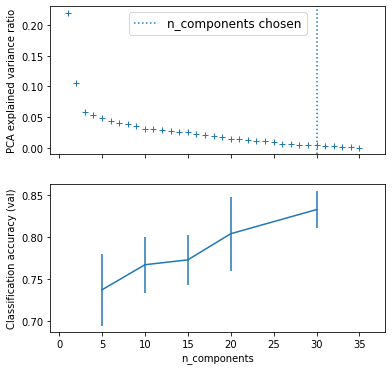

In [ ]:
# Plot the PCA spectrum
pcaPipe.fit(xApp)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pcaPipe.n_components_ + 1),
         pcaPipe.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pcaPipe'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pcaPipe__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 38)

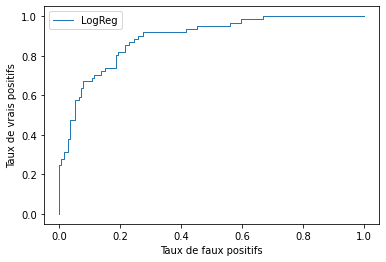

In [ ]:
# Courbe ROC


listMethod=[["LogReg",LogRegOpt]]

for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(xTest)
    fpr, tpr, thresholds = roc_curve(yTest, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

In [ ]:
#AUC Score

roc_auc_score(yTest, LogReg.predict_proba(xTest)[:, 1])

0.8866611628729804

In [ ]:
f1_score(yTest,LogReg.predict(xTest))

0.7058823529411765